# Uczenie nienadzorowane

## K-Means

### Kategorie uczenia nienadzorowanego
- Klasteryzacja
  - identyfikacja klas (segmentacja klientów)
  - redunkcja wymiarowości
  - analiza danych (po klasteryzacji, dla każdego klastra z osobna)
  - uczenie częściowo nadzorowane
  - segmentacja obrazu, detekcja, kompresja
- Detekcja anomalii, *anomaly detection*
  - detekcja wartości odstających, *outliers*
- Estymacja gęstości, *density estimation*

### Klasteryzacja
- Podobne do klasyfikacji, ale nie wiadomo ile jest klas

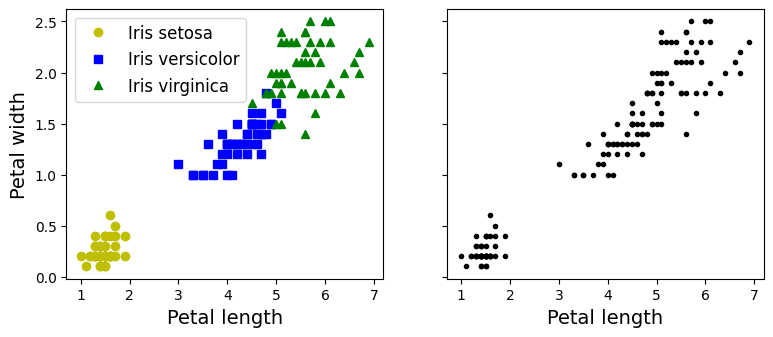

In [61]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

### K-Means
- Algorytm centroidów (Wikipedia)
- Algorytm stara się znaleźć środek każdego z *k* klastrów
- *k* jest parametrem algorytmu

### K-Means, przykład, dane

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

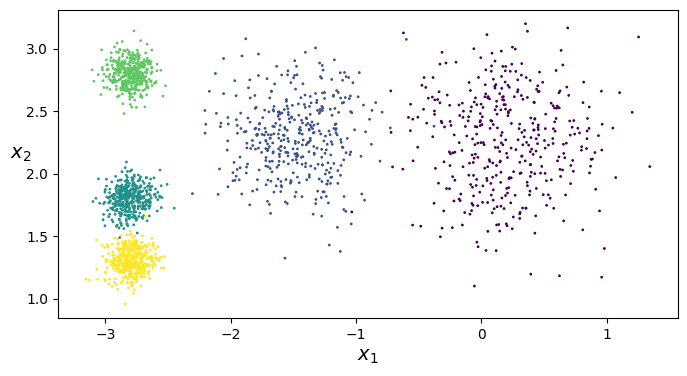

In [63]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X, y)
plt.show()

### K-Means, uczenie, wyniki

In [64]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)  #to samo co .fit().predict()
print(kmeans.labels_) # to samo co predict
print(y_pred)
print(kmeans.cluster_centers_)

[2 2 4 ... 1 4 2]
[2 2 4 ... 1 4 2]
[[-0.066884    2.10378803]
 [-2.79290307  2.79641063]
 [-2.80214068  1.55162671]
 [-1.47468607  2.28399066]
 [ 0.47042841  2.41380533]]


### K-Means, wizualizacja - diagram Woronoja

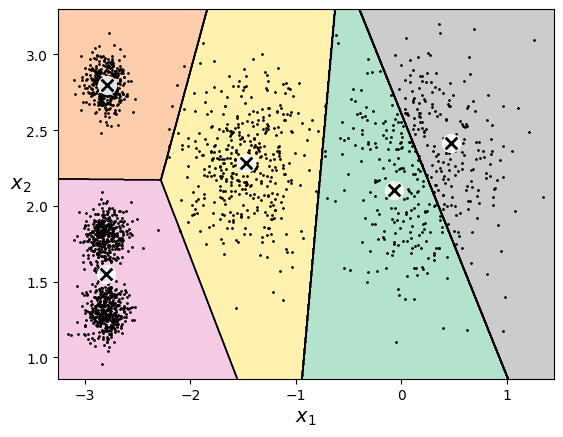

In [65]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plot_decision_boundaries(kmeans, X)
plt.show()

### K-Means, algorytm
1. Wylosuj lokalizacje *k* centroidów
2. Przyporządkuj instancje do najbliższego sąsiada
3. Oblicz nową lokalizację każdego centroidu jako średnią z lokalizacji instancji należących do niego
4. Jeżeli zmieniła się pozycja centroidu to idź do: 2

### K-Means, algorytm

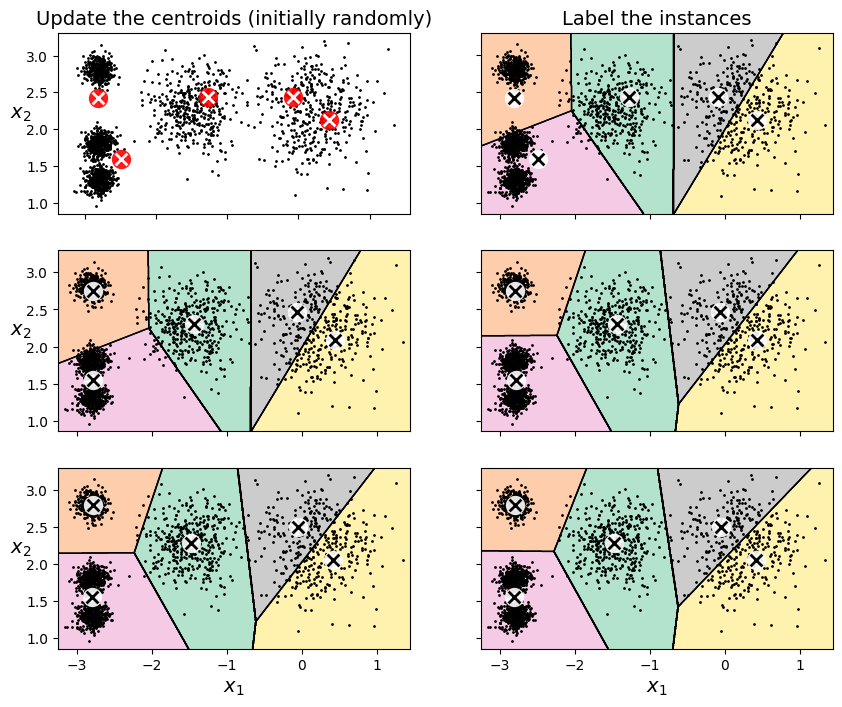

In [66]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.show()

K-Means, algorytm

- Zbieżny
- Nie gwarantuje znalezienia optimum - zależny od kroku 1
  - domyślnie algorytm uruchamiany jest 10 razy (parametr *n_init*=10)
  - wybierany jest model z najmniejszą *inercją*: średnio-kwadratowa odległość między instancjami i centroidami
    - pomierz odległość pomiędzy każdą instancją, a jej centroidem,
    - zsumuj kwadraty w/w odległości w ramach klastra,
    - zsumuj wartości *inercji* dla wszystkich klastrów
    - **KMeans.inertia_**

### Ile klastrów/grup?
- czasami inertia nie pomoże bo im więcej klastrów tym mniejsza

<Figure size 800x350 with 0 Axes>

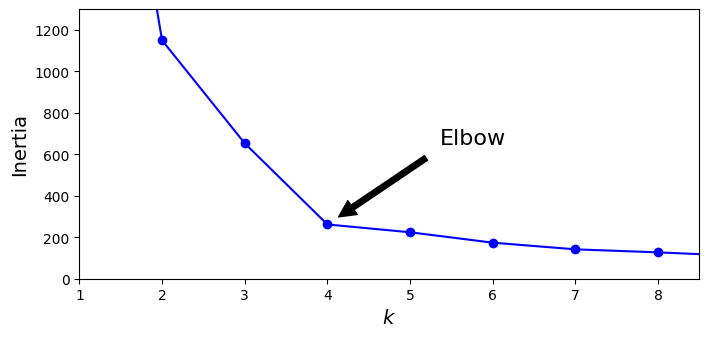

In [67]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

Widzimy punkt przegięcia, który może być wyznacznikiem nalepszego doboru *k*, czyli dla *k* = 4

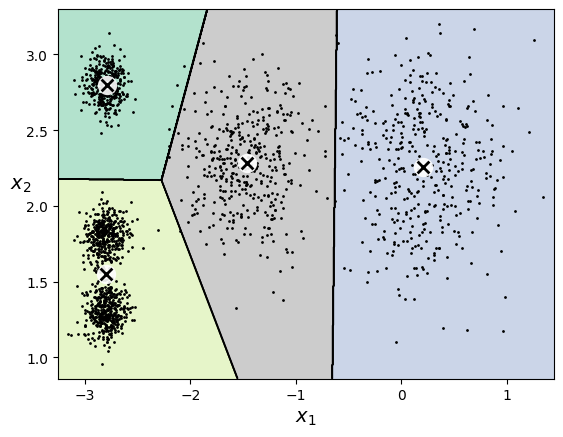

In [68]:
kmeans_4 = KMeans(n_clusters=4)
y_pred = kmeans_4.fit(X)
plt.cla()
plot_decision_boundaries(kmeans_4, X)
plt.show()

Nie musi być dokładnie taki sam podział! - wszystko zależy od pierwszego kroku algorytmu.

### Ile klastrów/grup?
- Wskaźnik sylwetkowy, *silhouette score* - średnia odległość pomiędzy obserwacjami wewnątrz grupy (a) i średnią odległość obserwacji do najbliższej "obcej" grupy (b). Silhouette obliczany jest dla każdej obserwacji w następujący sposób:

$s= \frac{a-b}{max(a,b}$

0.6267891051050735


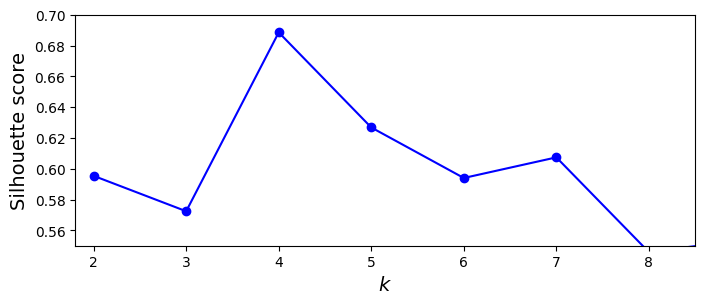

In [69]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Widzimy, że dla *k* = 4 Silhouette score jest największy co potwierdza naszą wcześniejszą tezę.

### Prosty przykład K-Means (1 wymiarowy)

In [70]:
X = [[1], [1], [2], [5], [6], [10]]
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)
print(kmeans.labels_)
print(y_pred)
print(kmeans.cluster_centers_)

[0 0 0 1 1 1]
[0 0 0 1 1 1]
[[1.33333333]
 [7.        ]]


## DBSCAN

1. Dla każdej instancji liczone jest ile instancji jest odległych o ϵ (wliczając tą instancję), tzw. sąsiedztwo-ϵ.
2. Jeżeli instancja ma przynajmniej *min_samples* w swoim sąsiedztwie-ϵ jest oznaczona jako rdzeń (*core*); tzw. instancja w "gęstym" obszarze.
3. Wszystkie instancje w sąsiedztwie rdzenia należą do tego samego klastra; sąsiednie, ϵ odległe rdzenie wchodzą w skład tego samego klastra.
4. Instancja, która nie jest rdzeniem i nie przynależy do żadnego rdzenia jest anomalią (watością odstającą) (*outlier*)

### DBSCAN, przykład

In [71]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [72]:
# zrobienie drugiego dbscan z innym epsilonem
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [73]:
# Wizualizacja
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

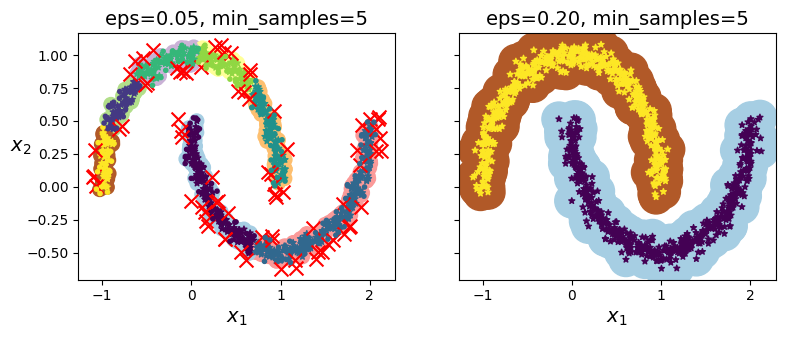

In [74]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()

In [75]:
print(dbscan.labels_[:15])
print(dbscan2.labels_[:15])

[ 0  2 -1 -1  1  0  0  0  2  5  2  3  0  2  2]
[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]


### Prosty przykład DBSCAN

In [76]:
X = [[1], [1], [2], [5], [6], [10]]
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(X)
print(dbscan.labels_)
print(dbscan.components_)

[ 0  0  0  1  1 -1]
[[1]
 [1]
 [2]
 [5]
 [6]]
